### Data Exploration

* To get an insight, I will explore the data set before making a model.

In [1]:
import numpy as np
import pandas as pd

admission = pd.read_csv("Admission_Predict.csv")

In [2]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011C9962C550>,
      dtype=object)

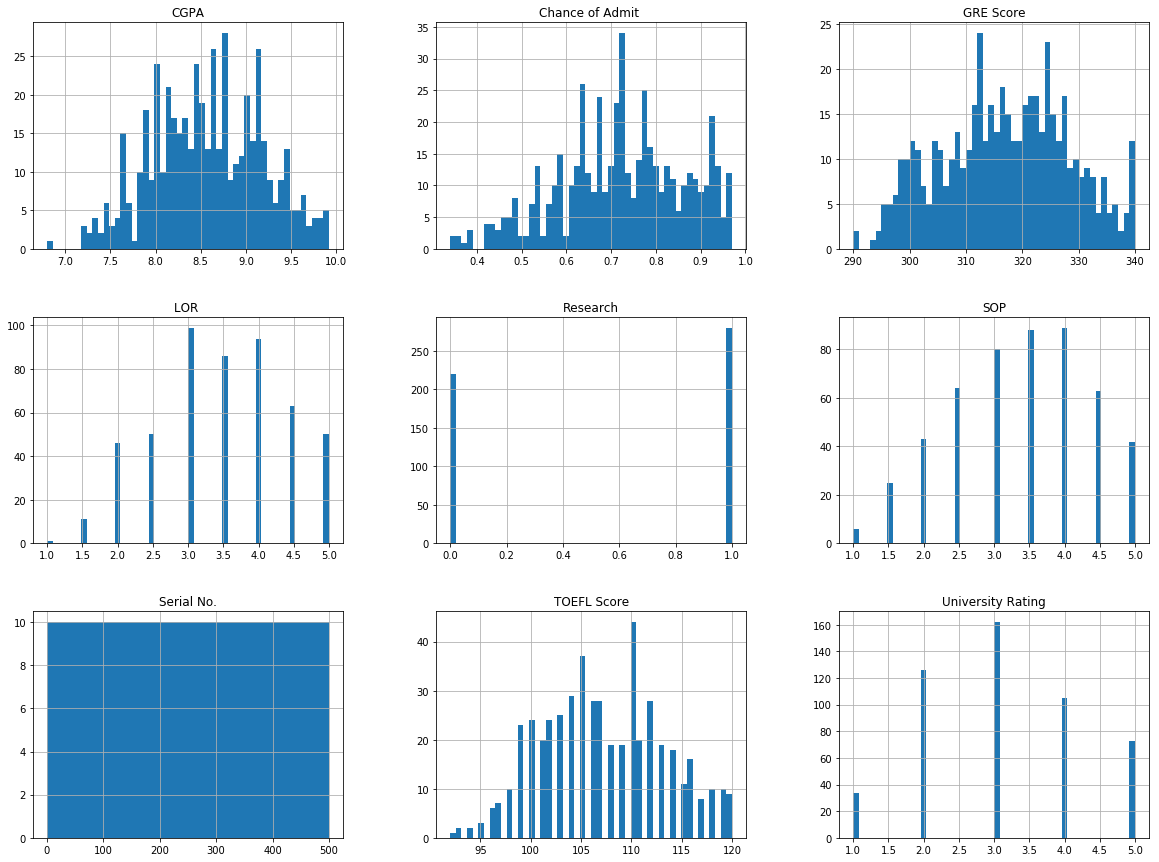

In [6]:
admission.hist(bins=50, figsize=(20,15))

In [7]:
np.random.seed(42)

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(admission, test_size = 0.2, random_state=42)

In [9]:
admission = train_set.copy()

In [10]:
corr_matrix = admission.corr()

In [11]:
corr_matrix["Chance of Admit "].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.878106
GRE Score            0.820509
TOEFL Score          0.789258
SOP                  0.680343
University Rating    0.679056
LOR                  0.626950
Research             0.544058
Serial No.           0.038060
Name: Chance of Admit , dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011C9E494908>,
      dtype=object)

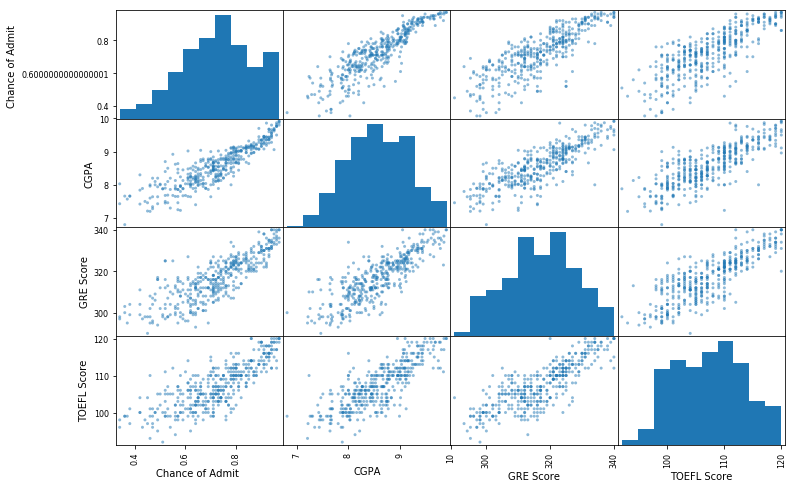

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["Chance of Admit ", "CGPA", "GRE Score", "TOEFL Score"]
scatter_matrix(admission[attributes], figsize=(12,8))

In [13]:
print(train_set.keys())

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [14]:
admission = train_set.drop(["Serial No.","Chance of Admit "], axis=1)

In [15]:
admission_labels = train_set["Chance of Admit "].copy()

## Select and train a model

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(admission, admission_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error
admission_predictions = lin_reg.predict(admission)
lin_mse = mean_squared_error(admission_labels, admission_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.059384808482100516

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(admission, admission_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [19]:
admission_predictions = tree_reg.predict(admission)
tree_mse = mean_squared_error(admission_labels, admission_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.6653345369377347e-17

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, admission, admission_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.08271941, 0.08732125, 0.08954049, 0.0654026 , 0.07125658,
       0.09319335, 0.09577317, 0.08042077, 0.10383882, 0.08336666])

In [21]:
tree_rmse_scores.mean(), tree_rmse_scores.std()

(0.08528330856080754, 0.010793853849394693)

In [22]:
lin_scores = cross_val_score(lin_reg, admission, admission_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([0.04981871, 0.06481945, 0.06934041, 0.06455844, 0.05446401,
       0.06664611, 0.06442842, 0.06261526, 0.05205124, 0.05016745])

In [23]:
lin_rmse_scores.mean(), lin_rmse_scores.std()

(0.059890949662881277, 0.007042155694291391)

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(admission, admission_labels)
admission_predictions = forest_reg.predict(admission)
forest_mse = mean_squared_error(admission_labels, admission_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.02498394884720987

In [25]:
forest_scores = cross_val_score(forest_reg, admission, admission_labels,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([0.05947494, 0.06538403, 0.07487861, 0.06637232, 0.05695899,
       0.06913624, 0.07258673, 0.05691467, 0.06369762, 0.06299029])

In [26]:
forest_rmse_scores.mean(), forest_rmse_scores.std()

(0.06483944270200476, 0.005833684092701445)

The score on the training set (0.029) is still much lower than on the validation sets (0.067) which means that the model is still overfitting the training set. We can try several ways to solve the overfitting: simplify the model, regularize it or get a lot more traing data, and so on.

### Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},    
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(admission, admission_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [28]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [29]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.07358630609321576 {'max_features': 2, 'n_estimators': 3}
0.06567096009652973 {'max_features': 2, 'n_estimators': 10}
0.06269590408383062 {'max_features': 2, 'n_estimators': 30}
0.07258252008729252 {'max_features': 4, 'n_estimators': 3}
0.06615706689387008 {'max_features': 4, 'n_estimators': 10}
0.06358666002656009 {'max_features': 4, 'n_estimators': 30}
0.07458272811672507 {'max_features': 6, 'n_estimators': 3}
0.07017731114826216 {'max_features': 6, 'n_estimators': 10}
0.0650684703472683 {'max_features': 6, 'n_estimators': 30}
0.07115554167534045 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.06419779980653544 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.07328862273383381 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.0660694331745021 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.07353495011821853 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.06598679792200861 {'bootstrap': False, 'max_features': 4, 'n_estim

In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.22576136, 0.16898452, 0.06812377, 0.09079931, 0.06333818,
       0.36128023, 0.02171263])

In [32]:
attributes = list(admission.columns)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36128022702593465, 'CGPA'),
 (0.22576136304772948, 'GRE Score'),
 (0.1689845176961347, 'TOEFL Score'),
 (0.09079930690455039, 'SOP'),
 (0.06812376924558473, 'University Rating'),
 (0.06333818188720346, 'LOR '),
 (0.021712634192862543, 'Research')]

We can see the most important three atrributes are CGPA, GRE Score and TOEFL Score.  
This coincides with what the heatmap tells:

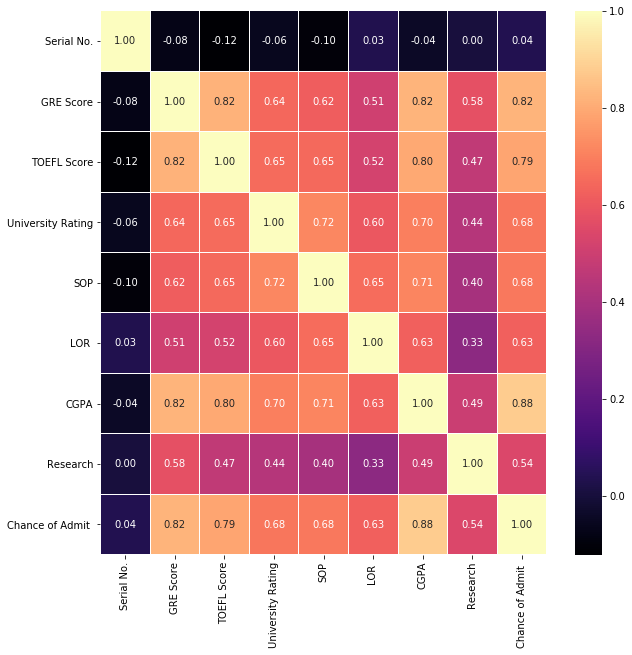

In [33]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_set.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

We can see the CGPA, GRE Score and TOEFL Score have the highest correlation with Chance of Admit.